<center> <h1> Tensorflow </h1> </center>

In [1]:
# !pip install tensorflow

import tensorflow as tf

print(tf.__version__)

2.15.0


In [2]:
a= tf.constant(5)
b= tf.constant(2)

c= a*b

print(c)

tf.Tensor(10, shape=(), dtype=int32)


In [3]:
print(c.numpy()) # This print the result directly

10


<center> <h1> Sequential Model </h1> </center>

In [5]:
import tensorflow as tf

# Sample input shape
input_shape= (10,)

# Initiate a Sequential model
model= tf.keras.Sequential()

# Add layers to the Model
model.add(tf.keras.layers.Dense(units= 64, activation= 'relu', input_shape= input_shape)) # With 64 neurons
model.add(tf.keras.layers.Dense(units= 32, activation= 'relu')) # With 32 neurons
model.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))  # With 1 neurons

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initiate a Sequential model
model= Sequential()

# Add a Dense layer with 10 units and Specify input dimension as 784
model.add(Dense(10, input_dim= 784))

# Alternatively, you can use batch_input_shape to specify input shape
model.add(Dense(10, batch_input_shape= (None, 784)))

<center> <h1> Digit Classification </h1> </center>

### Step-by-Step Guide to Creating a Simple Neural Network

1. **Prepare the Dataset.**
2. **Built the Model**
3. **Compile the Model**
4. **Train the Model.**
5. **Evaluate the Model.**

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [11]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

11490434/11490434 [==============================] - 0s 0us/step


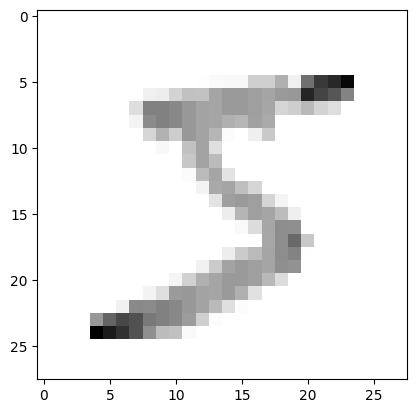

In [12]:
def draw(n):
	plt.imshow(n,cmap=plt.cm.binary)
	plt.show()

draw(x_train[0])

In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy']
			)
model.fit(x_train,y_train,epochs=3)


Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2691 - accuracy: 0.9214
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1133 - accuracy: 0.9647
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0749 - accuracy: 0.9762


In [14]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)


313/313 [==============================] - 3s 7ms/step - loss: 0.1034 - accuracy: 0.9684
loss->  0.10340262204408646 
acc->  0.9684000015258789


313/313 [==============================] - 1s 3ms/step
label ->  1
prediction ->  1


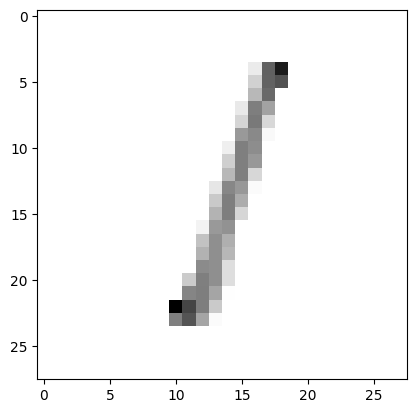

In [15]:
predictions=model.predict([x_test])
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])

In [16]:
#saving the model
# .h5 or .model can be used

model.save('epic_num_reader.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
new_model = tf.keras.models.load_model('epic_num_reader.h5')


313/313 [==============================] - 1s 2ms/step
label ->  1
prediction ->  1


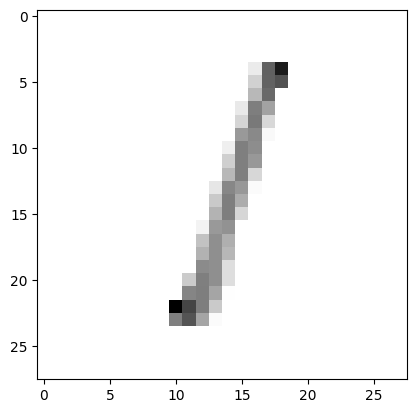

In [18]:
predictions=new_model.predict([x_test])


print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])


<center> <h1> Dog and Cat Classification </h1> </center>

In [3]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-07-17 12:15:36--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2024-07-17 12:15:37--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7cff950b8ab75930308c6d5119.dl.dropboxusercontent.com/cd/0/inline/CW1FDyIngNXbjlkxIEI56SDVGOsHr05RA9Ug3EBpNFw_bKVbKqudfMGNjNYrQT_Ljl5pV9BB44EhGRVYzPXVAWCEtbPVmcIbMx7v8pLaCuyujvkUt-d_Tf4sIN0iM0YDLZDcE0vaeVFjvyoEkiP6OPtD/file# [following]
--2024-07-17 12:15:37--  https://uc7cff950b8ab75930308c6d5119.dl.dropboxusercontent.co

In [4]:
!unzip training_set.zip
!!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

['Archive:  test_set.zip',
 '   creating: test_set/test_set/',
 '   creating: test_set/test_set/cats/',
 '  inflating: test_set/test_set/cats/_DS_Store  ',
 '  inflating: test_set/test_set/cats/cat.4001.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4002.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4003.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4004.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4005.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4006.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4007.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4008.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4009.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4010.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4011.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4012.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4013.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4014.jpg  ',
 '  inflating: test_set/test_set/cats/cat.4015.jpg  ',
 '  inflating: test

Populating the interactive namespace from numpy and matplotlib


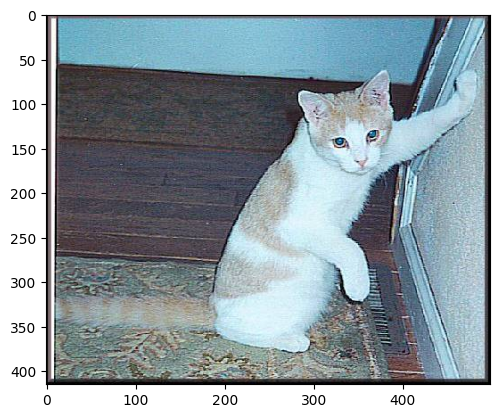

In [5]:
# Visualization of the data

%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img= mpimg.imread("/content/test_set/test_set/cats/cat.4001.jpg")
imgplot= plt.imshow(img)
plt.show()

In [6]:
import tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image


In [7]:
img_width, img_height= 150, 150
train_data_dir= r"/content/training_set/training_set"
validation_data_dir= r"/content/test_set/test_set"
nb_train_sample= 100
nb_validation_sample= 100
epochs= 20
batch_size= 20


In [9]:
train_datagen= ImageDataGenerator(rescale= 1. /255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True)

test_datagen= ImageDataGenerator(rescale= 1. /255)

train_generator= train_datagen.flow_from_directory(train_data_dir,
                                                    target_size= (img_width, img_height),
                                                    batch_size= batch_size,
                                                    class_mode= 'binary')

# this, will generate training generator data
# Target_size= mentioned image_width and image_height
# Batch size= 20 (already mentioned)
# Class_mode binary(because here only two classes are there to classify)

validation_generator= test_datagen.flow_from_directory(validation_data_dir,
                                                    target_size= (img_width, img_height),
                                                    batch_size= batch_size,
                                                    class_mode= 'binary')


# this, will generate testing generator data
# Target_size= mentioned image_width and image_height
# Batch size= 20 (already mentioned)
# Class_mode binary(because here only two classes are there to classify)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
import tensorflow.keras.backend as k

if k.image_data_format() == 'channels_first':
  input_shape= (3, img_width, img_height)

else:
  input_shape= (img_width, img_height, 3)


In [13]:
model= Sequential()
model.add(Conv2D(64, (3,3), input_shape=input_shape)) # 64 Neuron with 3*3 filter
# This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2))) # MaxPooling2D helps to reduce the size of data

model.add(Flatten()) # Cnnverts multi-dimensional array to 1D channel
model.add(Dense(64)) # 64 neurons with 3' 3 filter
# Numbers of output nodes in the hidden layer

model.add(Activation('relu'))
model.add(Dense(1)) # Output layer
model.add(Activation('sigmoid')) # sigmoid activation function
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [15]:
model.compile(optimizer= 'rmsprop',
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [16]:
training= model.fit_generator(train_generator,
                              steps_per_epoch= nb_train_sample,
                              epochs= epochs,
                              validation_data= validation_generator,
                              validation_steps= nb_validation_sample)

Epoch 1/20


<ipython-input-16-d6679b17ed03>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training= model.fit_generator(train_generator,


100/100 [==============================] - 23s 187ms/step - loss: 1.6027 - accuracy: 0.5420 - val_loss: 0.6690 - val_accuracy: 0.5775
Epoch 2/20
100/100 [==============================] - 16s 163ms/step - loss: 0.6837 - accuracy: 0.6040 - val_loss: 0.6301 - val_accuracy: 0.6480
Epoch 3/20
100/100 [==============================] - 27s 270ms/step - loss: 0.6433 - accuracy: 0.6420 - val_loss: 0.5811 - val_accuracy: 0.6900
Epoch 4/20
100/100 [==============================] - 22s 222ms/step - loss: 0.6293 - accuracy: 0.6450 - val_loss: 0.8535 - val_accuracy: 0.5660
Epoch 5/20
100/100 [==============================] - 27s 268ms/step - loss: 0.6119 - accuracy: 0.6590 - val_loss: 0.6405 - val_accuracy: 0.6490
Epoch 6/20
100/100 [==============================] - 19s 194ms/step - loss: 0.6063 - accuracy: 0.6670 - val_loss: 0.5767 - val_accuracy: 0.6860
Epoch 7/20
100/100 [==============================] - 26s 257ms/step - loss: 0.6038 - accuracy: 0.6821 - val_loss: 0.6409 - val_accuracy: 0.6

Trainig History Keys
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



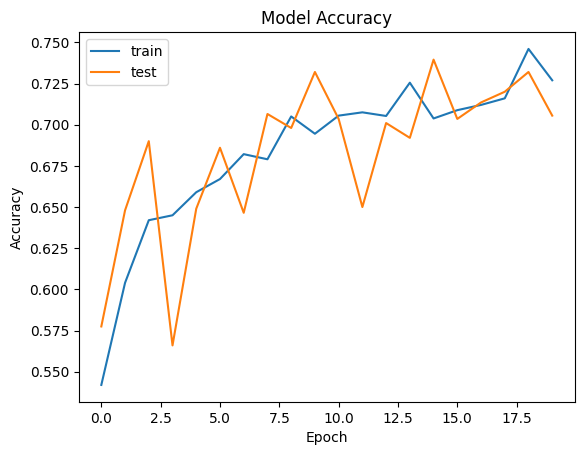

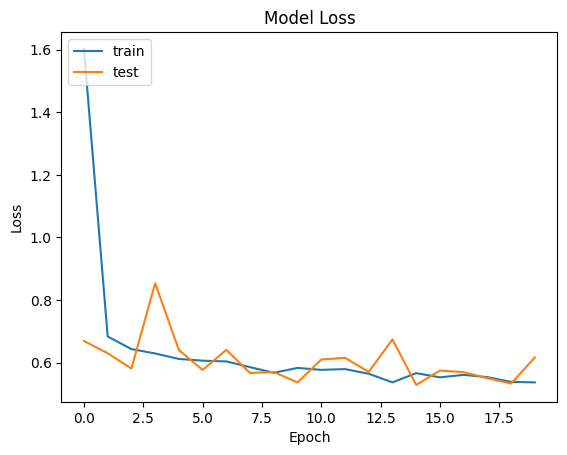

In [17]:
%matplotlib inline

# list all data in training
print("Trainig History Keys")
print(training.history.keys())
print()

# Summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

# Summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

1/1 [==============================] - 0s 85ms/step
[[0.]]
Prediction :  Cat


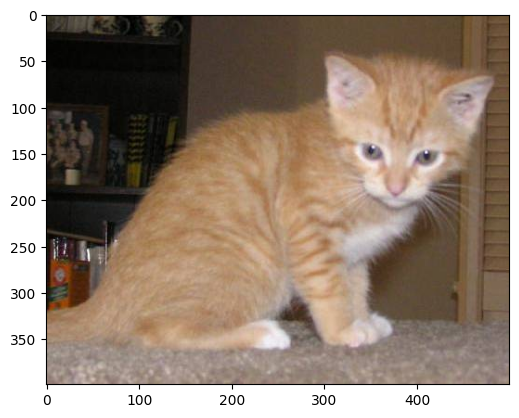

In [23]:
from tensorflow.keras.preprocessing import image

img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg", target_size= (150, 150))

img_pred=  image.img_to_array(img_pred)
img_pred= np.expand_dims(img_pred, axis=0)

rslt= model.predict(img_pred)
print(rslt)

if rslt[0][0] == 1:
  prediction = "Dog"
else:
  prediction = "Cat"
print("Prediction : ", prediction)

img= mpimg.imread("/content/test_set/test_set/cats/cat.4003.jpg")
imgplot= plt.imshow(img)
plt.show()

In [26]:
import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
# import numpy as np
# serialize model to JSON
#mode12 sequential()
model_json = model.to_json()
with open("model.to_json", "w") as json_file:
  json_file.write(model_json)

model.save_weights('first_try.h5')
print("[INFO] Saved model to disk")

[INFO] Saved model to disk
